In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
#normalize the pixel values of the images to the range [0, 1] by dividing them by 255.0.

170498071/170498071 [==============================] - 3s 0us/step


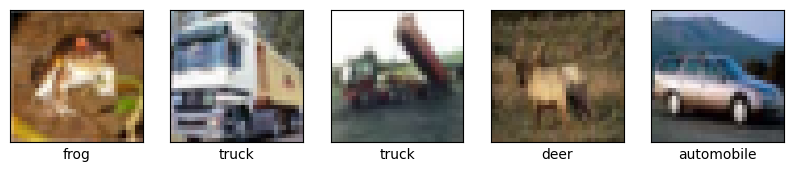

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# create a grid of 5x5 subplots and display the first 5 images from the training set along with their corresponding class names.
plt.figure(figsize=(10,10)) #creates a new figure with a size of 10x10 inches for the plot
for i in range(5):
    plt.subplot(5,5,i+1) #5, 5, i+1) specify the grid layout, and i+1 is the current subplot being created, ranging from 1 to 25.
    plt.xticks([]) #remove the ticks (markings) on the x and y axes of each subplot.
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]]) #retrieves class name of i-th fig
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
#32x32 size with 3 color and conv2D(32)is to set 32 filters 3,3 is grid size
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

In [ ]:
model.add(layers.Flatten()) #convert 3D feature map to 1D so that fullyconnected layer takes 1D input
model.add(layers.Dense(64, activation='relu')) #Dense  is used for prediction and indicates that is has 64 neuron
model.add(layers.Dense(10)) # add the output layer with 10 neurons (for 10 classes in CIFAR-10) without an activation function.
#The final layer uses a linear activation function (the default) because it is used for regression-like problems (predicting class scores).

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [ ]:
model.compile(optimizer='adam', #Adaptive moment optimization
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), #loss function
              metrics=['accuracy'])    #sparse categorical cross-entropy loss function (appropriate for multi-class classification tasks)

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 110s 69ms/step - loss: 1.5183 - accuracy: 0.4478 - val_loss: 1.2779 - val_accuracy: 0.5406
Epoch 2/10
1563/1563 [==============================] - 96s 62ms/step - loss: 1.1613 - accuracy: 0.5901 - val_loss: 1.1211 - val_accuracy: 0.5972
Epoch 3/10
1563/1563 [==============================] - 87s 56ms/step - loss: 1.0128 - accuracy: 0.6441 - val_loss: 1.0391 - val_accuracy: 0.6345
Epoch 4/10
1563/1563 [==============================] - 108s 69ms/step - loss: 0.9133 - accuracy: 0.6786 - val_loss: 0.9186 - val_accuracy: 0.6800
Epoch 5/10
1563/1563 [==============================] - 92s 59ms/step - loss: 0.8510 - accuracy: 0.7017 - val_loss: 0.9340 - val_accuracy: 0.6751
Epoch 6/10
1563/1563 [==============================] - 96s 61ms/step - loss: 0.7972 - accuracy: 0.7219 - val_loss: 0.9234 - val_accuracy: 0.6802
Epoch 7/10
1563/1563 [==============================] - 106s 68ms/step - loss: 0.7503 - accuracy: 0.7374 - val_loss: 0.899

313/313 - 5s - loss: 0.8957 - accuracy: 0.7045 - 5s/epoch - 17ms/step


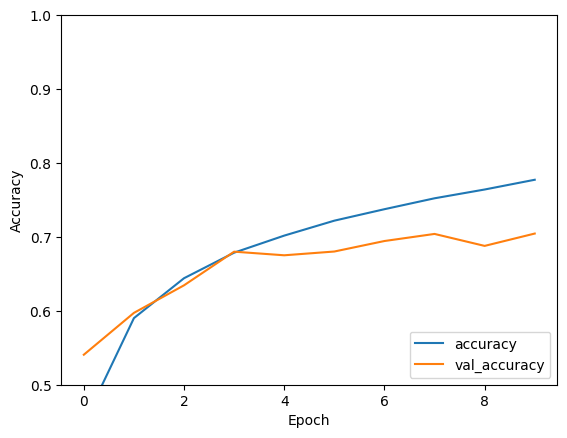

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
# evaluates the model on the test data and calculates the test loss and accuracy.